In [7]:
import cvxpy as cvx
import numpy as np
import matplotlib.pyplot as plt

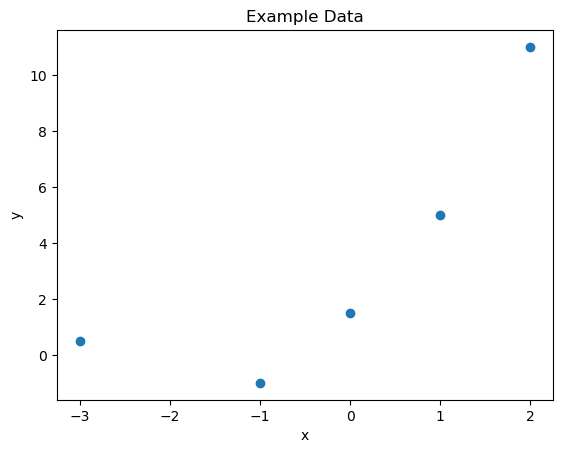

In [5]:
x = np.array([-3,  -1, 0,   1, 2])
y = np.array([0.5, -1, 1.5, 5, 11])
plt.scatter(x,y)
plt.xlabel('x'); plt.ylabel('y'); plt.title('Example Data')
plt.show()

In [9]:
A = np.column_stack((np.ones(5,), x, x**2))

# now setup and solve with CVXPY
beta = cvx.Variable(3)

# CVXPY's norm behaves like np.linalg.norm
# obj = cvx.Minimize(cvx.norm(A*beta-y)) # this syntax does not work
obj = cvx.Minimize(cvx.norm(A@beta-y))
prob = cvx.Problem(obj)

# Assuming the problem follows the DCP ruleset,
# CVXPY will select a solver and try to solve the problem.
# We can check if the problem is a disciplined convex program
# with prob.is_dcp().
prob.solve()

print("Problem status: ", prob.status)
print("Optimal value:  ", prob.value)
print("Optimal varriables beta:\n", beta.value)

Problem status:  optimal
Optimal value:   0.34962635220491045
Optimal varriables beta:
 [1.23858616 3.01656848 0.92157585]


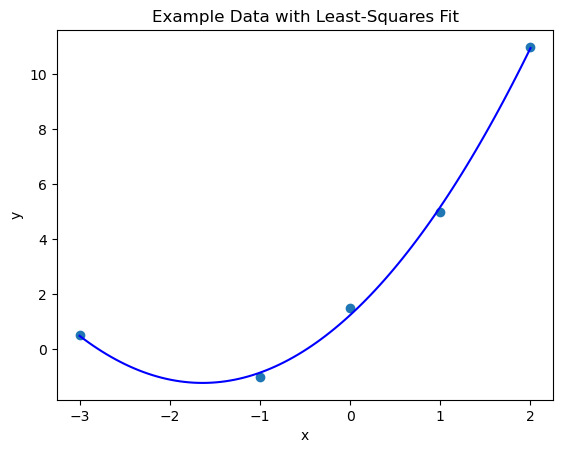

In [10]:
_beta = beta.value # get the optimal vars
_x = np.linspace(x.min(), x.max(), 100)
_y = _beta[0]*np.ones_like(_x) + _beta[1]*_x + _beta[2]*_x**2
plt.scatter(x,y)
plt.plot(_x,_y,'-b')
plt.xlabel('x'); plt.ylabel('y'); plt.title('Example Data with Least-Squares Fit')
plt.show()

# Ehhhh

In [11]:
A = np.array([[1, 6,11, 5,10, 4, 9, 3, 8, 2],
                 [2, 7, 1, 6,11, 5,10, 4, 9, 3],
                 [3, 8, 2, 7, 1, 6,11, 5,10, 4],
                 [4, 9, 3, 8, 2, 7, 1, 6,11, 5],
                 [5,10, 4, 9, 3, 8, 2, 7, 1, 6]])

y = np.array([1,2,3,4,5]).T

In [29]:
# 1
X = cvx.Variable(A.shape[1])
objective = cvx.Minimize(cvx.norm2(X))
constraints = [cvx.norm2(A @ X - y) <= 0.1]
prob = cvx.Problem(objective, constraints)
result = prob.solve()
print(result)

0.2942164770022343


In [30]:
# 2
X = cvx.Variable(A.shape[1])
objective = cvx.Minimize(cvx.norm2(X)**2)
constraints = [cvx.norm2(A @ X - y) <= 0.1]
prob = cvx.Problem(objective, constraints)
result = prob.solve()
print(result)

0.08656333539317528


In [31]:
# 3
X = cvx.Variable(A.shape[1])
objective = cvx.Minimize(cvx.norm1(X))
constraints = [cvx.norm2(A @ X - y) <= 0.1]
prob = cvx.Problem(objective, constraints)
result = prob.solve()
print(result)

0.7876692196039305


In [41]:
# 4

## resolve 1
X = cvx.Variable(A.shape[1])
objective = cvx.Minimize(cvx.norm2(X))
constraints = [cvx.norm2(A @ X - y) <= 0.1]
prob = cvx.Problem(objective, constraints)
result = prob.solve()
_lambda = constraints[0].dual_value
print(X.value)


## solve with dual
X = cvx.Variable(A.shape[1])
objective_2 = cvx.Minimize(cvx.norm2(X) + _lambda*cvx.norm2(A @ X - y))
prob2 = cvx.Problem(objective_2)
result2 = prob2.solve()
print(X.value)
print(result2)

[ 0.08864832  0.13978231 -0.0383361   0.12955551 -0.04299821  0.11932871
 -0.04291857  0.10910191 -0.03607939  0.09887512]
[ 0.08864735  0.13978115 -0.03833458  0.12955439 -0.0429978   0.11932763
 -0.04291794  0.10910087 -0.03607703  0.09887411]
0.3013028438452442


In [56]:
# 5
def g(mat):
    return cvx.sum([
        cvx.norm2(mat[:,i]) for i in range(mat.shape[1])
    ])
    

X = cvx.Variable(A.shape[1])
objective = cvx.Minimize(g(A - X @ np.ones(10).T))
prob = cvx.Problem(objective, constraints)
result = prob.solve()
print(result)

65.79097646248474
